In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import cartopy.feature as cfeature 
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np
import matplotlib.path as mpath
import matplotlib.cm as cm

import cmocean

In [3]:
def plot_one_var(run,var,namevar,cmap,vmin,vmax,unit):
    file='/bettik/alberta/small-arctic-10km-sidfex/experiments/'+str(run)+'/Moorings.nc'
    ds=xr.open_dataset(file)

    plt.figure(figsize=(15, 15))
    ax = plt.axes(projection=ccrs.Orthographic(central_longitude=0.0, central_latitude=90.0)) 
    ax.set_extent([-180, 180, 70, 90], ccrs.PlateCarree())
    land = cfeature.GSHHSFeature(scale='intermediate',
                                     levels=[1],
                                     facecolor=cfeature.COLORS['land'])
    ax.add_feature(land)
    gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                          alpha=0.5)
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    ax.tick_params('both',labelsize=22)

    plt.pcolormesh(ds.longitude,ds.latitude,ds[var][-1],transform=ccrs.PlateCarree(),cmap=cmap,vmin=vmin,vmax=vmax,shading='auto')
    plt.colorbar()
    plt.title('Final state of '+str(namevar)+' in '+str(unit)+' for simulation '+str(run)+' '+np.datetime_as_string(ds.time[-1], unit='D'))
    plt.savefig('/bettik/alberta/plots_nextsim/plots-on-dahu/plots/map-final-state-run-'+str(run)+'-'+str(var)+'.png')

In [4]:
def tous_les_plots_run(run):
    plot_one_var(run,'sic','Sea Ice Concentration',cmocean.cm.ice,0,1,'-')
    plot_one_var(run,'sit','Sea Ice Concentration',cmocean.cm.ice,0,2,'m')
    plot_one_var(run,'damage','Sea Ice Damage','bone',0,1,'-')
    plot_one_var(run,'hfs','Heat flux',cmocean.cm.solar,0,200,'W/m2')

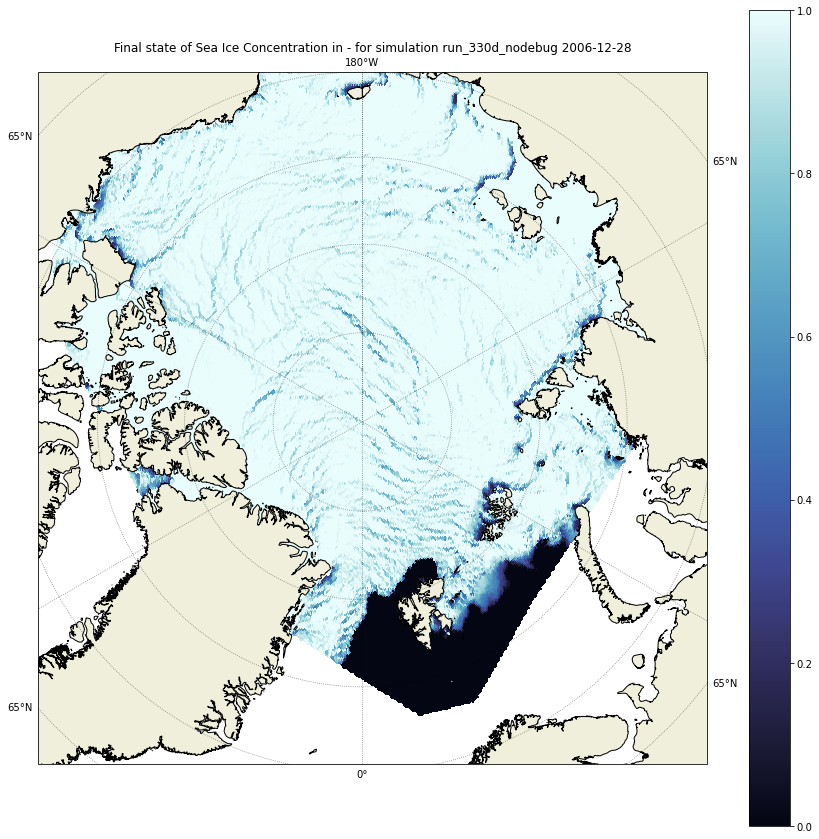

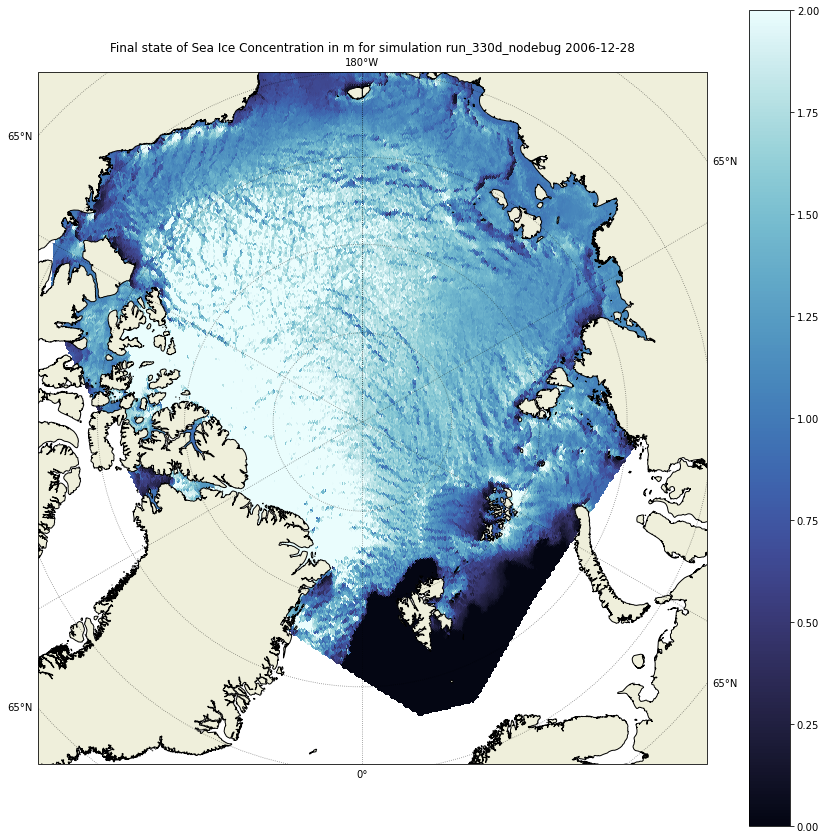

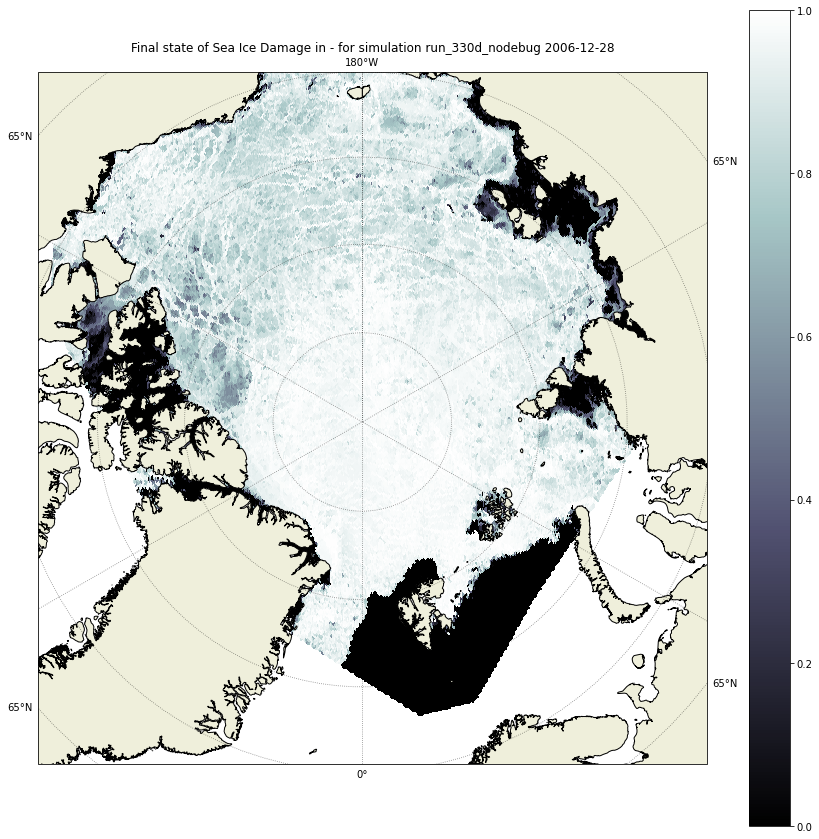

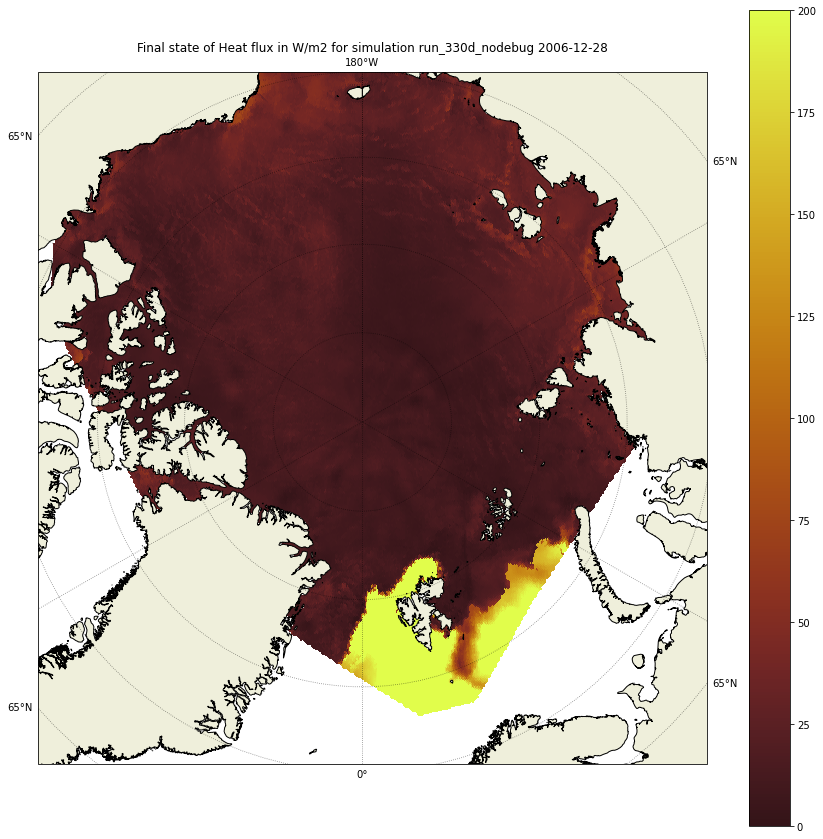

In [5]:
tous_les_plots_run('run_330d_nodebug')